In [28]:
import numpy as np
import pandas as pd

In [29]:
#q1 Load in the appropriate csv file as a pandas dataframe 
df = pd.read_csv('Batting.csv')
df.head()

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [30]:
#q2 Print out the dimensions and info about the dataframe you just created
print("Shape is (rows,columns):", df.shape)
df.info()

Shape is (rows,columns): (102816, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null flo

In [31]:
#q3 How many players have hit 40 or more HRs in one single season
df3 = df.groupby(['yearID','playerID'], as_index=False).sum()
df3.loc[df3['HR'] >= 40,'playerID'].nunique()

142

In [33]:
#q4 How many players have hit 600 or more HRs for their career? 
df4 = df.groupby(['playerID','nameFirst','nameLast'], as_index=True).sum()
df4 = df4[df4['HR'] >= 600]
df4['HR']

playerID   nameFirst  nameLast 
aaronha01  Hank       Aaron        755
bondsba01  Barry      Bonds        762
griffke02  Ken        Griffey      630
mayswi01   Willie     Mays         660
rodrial01  Alex       Rodriguez    696
ruthba01   Babe       Ruth         714
sosasa01   Sammy      Sosa         609
thomeji01  Jim        Thome        612
Name: HR, dtype: int64

In [34]:
#q5 How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? 
df5 = df.groupby(['yearID','playerID'], as_index=False).sum()
df5.loc[(df5['2B'] >= 40) & (df5['3B'] >= 10) & (df5['H'] >= 200) & (df5['HR'] >= 30),'playerID'].nunique()

11

In [35]:
#q6 How many players seasons have had 100 or more SBs? 
df6 = df.groupby(['yearID','playerID','nameFirst','nameLast'], as_index=True).sum()
df6 = df6.loc[df6['SB'] >= 100]
df6['SB'].drop_duplicates()

yearID  playerID   nameFirst  nameLast 
1887    brownpe01  Pete       Browning     103.0
        comisch01  Charlie    Comiskey     117.0
        fogarji01  Jim        Fogarty      102.0
        lathaar01  Arlie      Latham       129.0
        nicolhu01  Hugh       Nicol        138.0
        wardjo01   John       Ward         111.0
1888    lathaar01  Arlie      Latham       109.0
1891    brownto01  Tom        Brown        106.0
1962    willsma01  Maury      Wills        104.0
1974    brocklo01  Lou        Brock        118.0
1980    henderi01  Rickey     Henderson    100.0
1982    henderi01  Rickey     Henderson    130.0
1983    henderi01  Rickey     Henderson    108.0
1985    colemvi01  Vince      Coleman      110.0
1986    colemvi01  Vince      Coleman      107.0
Name: SB, dtype: float64

In [36]:
#q7 How many players in the 1960s (yearID) have hit 200 or more HRs? 
df7 = df.groupby(['yearID','playerID','nameFirst','nameLast'], as_index=False).sum()
df7 = df7[(df7['yearID'] >= 1960) & (df7['yearID'] <= 1969)]
df7 = df7.groupby(['playerID','nameFirst','nameLast'], as_index = True).sum()
df7 = df7[df7['HR']>200]
df7 = df7.sort_values(by=['HR'], ascending = False)
df7['HR']

playerID   nameFirst  nameLast   
killeha01  Harmon     Killebrew      393
aaronha01  Hank       Aaron          375
mayswi01   Willie     Mays           350
robinfr02  Frank      Robinson       316
mccovwi01  Willie     McCovey        300
howarfr01  Frank      Howard         288
cashno01   Norm       Cash           278
bankser01  Ernie      Banks          269
mantlmi01  Mickey     Mantle         256
cepedor01  Orlando    Cepeda         254
santoro01  Ron        Santo          253
willibi01  Billy      Williams       249
colavro01  Rocky      Colavito       245
allisbo01  Bob        Allison        225
marisro01  Roger      Maris          217
matheed01  Eddie      Mathews        213
kalinal01  Al         Kaline         210
powelbo01  Boog       Powell         202
yastrca01  Carl       Yastrzemski    202
Name: HR, dtype: int64

In [37]:
#q8 Who has hit the most HRs in history? 
df8 = df.groupby(['playerID','nameFirst','nameLast'], as_index=True).sum()
df81 = df8[df8['HR'] == max(df8.HR)]
df81['HR']

playerID   nameFirst  nameLast
bondsba01  Barry      Bonds       762
Name: HR, dtype: int64

In [38]:
#q9 Who had the most hits (H) in the 1970s? 
df9 = df.groupby(['yearID','playerID','nameFirst','nameLast'], as_index=False).sum()
df9 = df9[(df9['yearID'] >= 1970) & (df9['yearID'] <= 1979)]
df9 = df9.groupby(['playerID','nameFirst','nameLast'], as_index=True).sum()
df9
df9[df9['H'] == max(df9.H)]['H']

playerID  nameFirst  nameLast
rosepe01  Pete       Rose        2045
Name: H, dtype: int64

In [39]:
#q10 Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  
df10 = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
df10['OBP'] = (df10['H'] + df10['BB'] + df10['IBB'] + df10['SH'] + df10['SF']) / df10['AB']
df10['PA'] = df10['AB'] + df10['BB'] + df10['IBB'] + df10['SH'] + df10['SF']

df10 = df10[(df10['yearID'] == 1977) & (df10['PA'] >= 500)]
df10 = df10.sort_values(by = ['OBP'], ascending=False)[0:5][['nameFirst', 'nameLast', 'OBP']]
df10.reset_index(drop=True)

,nameFirst,nameLast,OBP
0,Ken,Singleton,0.563433
1,Reggie,Smith,0.559426
2,Gene,Tenace,0.556064
3,Mike,Hargrove,0.540952
4,Rod,Carew,0.534091


In [40]:
#q11 Top 8 highest averages in 2013 with at least 300 PAs? 
df11 = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
df11['PA'] = df11['AB'] + df11['BB'] + df11['IBB'] + df11['SH'] + df11['SF']
df11['Averages'] = df11['H'] / df11['AB']

df11 = df11[(df11['yearID'] == 2013) & (df11['PA'] >= 300)]
df11 = df11.sort_values(by = ['Averages'], ascending=False)[0:8][['nameFirst', 'nameLast', 'Averages']]
df11.reset_index(drop=True)

,nameFirst,nameLast,Averages
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


In [41]:
#q12 Leaders in hits from 1940 up to and including 1949
df12 = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()

df12 = df12[(df12['yearID'] >= 1940) & (df12['yearID'] <= 1949)].sort_values(by = ['H'], ascending=False)
df12 = df12.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()

df12.sort_values(by = 'H', ascending = False)[0:10][['playerID', 'nameFirst', 'nameLast', 'H']].reset_index(drop = True)

,playerID,nameFirst,nameLast,H
0,boudrlo01,Lou,Boudreau,1578
1,elliobo01,Bob,Elliott,1563
2,walkedi02,Dixie,Walker,1512
3,musiast01,Stan,Musial,1432
4,doerrbo01,Bobby,Doerr,1407
5,holmeto01,Tommy,Holmes,1402
6,applilu01,Luke,Appling,1376
7,nichobi01,Bill,Nicholson,1328
8,marioma01,Marty,Marion,1310
9,cavarph01,Phil,Cavarretta,1304


In [42]:
#q13 Who led MLB with the most hits the most times?  And how many times?
df13=df.groupby(['playerID','yearID'],as_index=False)[['H']].sum()
df13_max=df13.groupby('yearID',as_index=False)[['H']].max()

df13_final=pd.merge(df13,df13_max,on=['yearID','H'],how='right')

most_hits=df13_final.groupby('playerID',as_index=False)[['yearID']].count().rename(columns={'yearID':'Number_of_times'}).sort_values(by=['Number_of_times'],ascending=False).reset_index(drop=True)
print(most_hits[most_hits['Number_of_times']==max(most_hits['Number_of_times'])])

    playerID  Number_of_times
0  suzukic01                7
1   cobbty01                7
2   rosepe01                7


In [43]:
#q14 Which players have played the most games for their careers?  Top 5 
df14 = df.groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()

df14[['playerID', 'nameFirst', 'nameLast','G']].sort_values(by = 'G', ascending=False)[0:5].reset_index(drop = True)

,playerID,nameFirst,nameLast,G
0,rosepe01,Pete,Rose,3562
1,yastrca01,Carl,Yastrzemski,3308
2,aaronha01,Hank,Aaron,3298
3,henderi01,Rickey,Henderson,3081
4,cobbty01,Ty,Cobb,3035


In [44]:
#q15 How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  
df15 = df.groupby(['playerID'], as_index = False).sum()
df15[(df15['H'] > 3000) & (df15['HR'] >= 500)].playerID.nunique()

5

In [46]:
#q16 How many HRs were hit during the entire 1988 season?  
df16 = df.groupby(['yearID'], as_index=False).sum()
df16 = df16[df16['yearID'] == 1988]
df16.HR.max()

3180

In [48]:
#q17 Please filter out and show me the top 3 average seasons by Wade Boggs during his career 
#in seasons in which he had at least 500 or more ABs

df17 = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
df17['Average'] = df17['H'] / df17['AB']

df17[(df17['AB'] >= 500) & (df17['nameFirst'] == 'Wade') & 
       (df17['nameLast'] == 'Boggs')].sort_values(by = 'Average', ascending = False)[0:3][['yearID', 'playerID', 'nameFirst', 'nameLast', 'AB', 'Average']]

,yearID,playerID,nameFirst,nameLast,AB,Average
57921,1985,boggswa01,Wade,Boggs,653,0.367534
60800,1988,boggswa01,Wade,Boggs,584,0.366438
59818,1987,boggswa01,Wade,Boggs,551,0.362976


In [49]:
#q18 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending

df18 = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
df18['OBP'] = (df18['H'] + df18['BB'] + df18['IBB'] + df18['SH'] + df18['SF']) / df18['AB']
df18['PA'] = df18['AB'] + df18['BB'] + df18['IBB'] + df18['SH'] + df18['SF']

df18[(df18['yearID'] == 1995) & (df18['PA'] >= 400)].sort_values(by = 'OBP',
                                                                       ascending = False)[0:10][['yearID', 'playerID', 'nameFirst', 'nameLast', 'OBP', 'PA']]

,yearID,playerID,nameFirst,nameLast,OBP,PA
68848,1995,thomafr04,Frank,Thomas,0.667343,670.0
68474,1995,martied01,Edgar,Martinez,0.628180,650.0
68505,1995,mcgwima01,Mark,McGwire,0.586751,416.0
67953,1995,bondsba01,Barry,Bonds,0.583004,652.0
68081,1995,davisch01,Chili,Davis,0.577830,534.0
68458,1995,magadda01,Dave,Magadan,0.551724,431.0
68851,1995,thomeji01,Jim,Thome,0.542035,555.0
67892,1995,baineha01,Harold,Baines,0.524675,472.0
68926,1995,weisswa01,Walt,Weiss,0.524590,540.0
67950,1995,boggswa01,Wade,Boggs,0.510870,546.0


In [50]:
#q19 Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  
df19 = df[(df['yearID'] == 1922) | (df['yearID'] == 1925) | (df['yearID'] == 1926) | 
          (df['yearID'] == 1928)].groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum().sort_values(by = '3B', ascending = False)[0:1][['playerID', 'nameFirst', 'nameLast', '3B']]

df19

,playerID,nameFirst,nameLast,3B
1011,walkecu01,Curt,Walker,59


In [51]:
#q20 How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?
df20 = df.groupby(['yearID','playerID'], as_index=False).sum()
df20[(df20['SB'] >= 3000) & (df20['HR'] >= 30)].playerID.nunique()

0

In [52]:
#q21 Who had the highest OBP is 1986 with 400 or more ABs? 
df21 = df.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
df21['OBP'] = (df21['H'] + df21['BB'] + df21['IBB'] + df21['SH'] + df21['SF']) / df21['AB']

df21 = df21[(df21['yearID'] == 1986) & (df21['AB'] >= 400)]
df21 = df21.sort_values(by = ['OBP'], ascending=False)[0:1][['nameFirst', 'nameLast', 'OBP']]
df21.reset_index(drop=True)

,nameFirst,nameLast,OBP
0,Wade,Boggs,0.575862


In [53]:
#q22 Same question but for 1997 and only in the NL (check league ID)? 
df22 = df.groupby(['yearID', 'playerID','lgID', 'nameFirst', 'nameLast'], as_index = False).sum()
df22['OBP'] = (df22['H'] + df22['BB'] + df22['IBB'] + df22['SH'] + df22['SF']) / df22['AB']

df22 = df22[(df22['yearID'] == 1997) & (df22['lgID'] == 'NL') & (df22['AB'] >= 400)]
df22 = df22.sort_values(by = ['OBP'], ascending=False)[0:1][['nameFirst', 'nameLast', 'OBP']]
df22.reset_index(drop=True)

,nameFirst,nameLast,OBP
0,Barry,Bonds,0.637218


In [54]:
#q23 23 Who had more than the league average HRs (for players with 500 or more ABs) in 2012 ? 

df23 = df[(df['yearID'] == 2012)].groupby(['playerID', 'nameFirst', 'nameLast'], as_index = False).sum()
df23['PA'] = df23['AB'] + df23['BB'] + df23['IBB'] + df23['SH'] + df23['SF']

df23 = df23[(df23['HR'] > np.mean(df23.HR)) & (df23['PA'] >= 500)].sort_values(by = 'HR', ascending = False)
df23[['playerID', 'nameFirst', 'nameLast', 'HR', 'PA']]


,playerID,nameFirst,nameLast,HR,PA
156,cabremi01,Miguel,Cabrera,44,711.0
451,grandcu01,Curtis,Granderson,43,683.0
481,hamiljo03,Josh,Hamilton,43,644.0
348,encared01,Edwin,Encarnacion,42,645.0
331,dunnad01,Adam,Dunn,41,651.0
119,braunry02,Ryan,Braun,41,681.0
1121,stantmi03,Giancarlo,Stanton,37,505.0
82,beltrad01,Adrian,Beltre,36,657.0
1255,willijo03,Josh,Willingham,35,605.0
130,bruceja01,Jay,Bruce,34,640.0


In [55]:
#q24 Who is the youngest player to hit 50 or more HRs in a single season
df24 = df.groupby(['yearID', 'playerID','birthYear','nameFirst', 'nameLast'], as_index = False).sum()
df24['Age']  = df24['yearID'] - df24['birthYear']

df24 = df24[df24['HR'] >= 50].sort_values(by = ['Age'], ascending=True)[0:1][['nameFirst', 'nameLast','yearID', 'HR']]
df24.reset_index(drop=True)

,nameFirst,nameLast,yearID,HR
0,Prince,Fielder,2007,50


In [56]:
#q25 Who are the five youngest players to hit 300 or more HRs for their career? 
df25 = df.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID']).sum().groupby(level=0).cumsum().reset_index()
df25 = df25[df25['HR'] >= 300].sort_values(by = ['yearID', 'birthYear', 'playerID'])[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']]

df25['Age'] = df25['yearID'] - df25['birthYear']
df25.sort_values(by = 'Age', ascending = True)[0:5]

,playerID,nameFirst,nameLast,birthYear,yearID,HR,Age
69369,pujolal01,Albert,Pujols,1980,2008,319,28
64767,ottme01,Mel,Ott,1909,1937,306,28
43074,jonesan01,Andruw,Jones,1977,2005,301,28
27852,foxxji01,Jimmie,Foxx,1907,1935,302,28
73216,rodrial01,Alex,Rodriguez,1975,2003,345,28


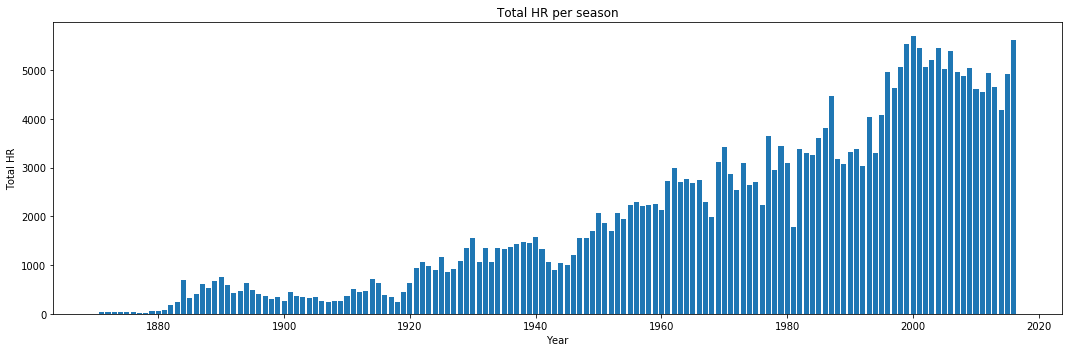

In [57]:
# bonus question 
# Graph total HRs per season using bar graph
import matplotlib.pyplot as plt
%matplotlib inline

df26 = df.groupby('yearID').sum()['HR'].reset_index()

fig, axes = plt.subplots(figsize=(15,5))
axes.bar(df26['yearID'],df26['HR'], align="center")
axes.set_title("Total HR per season")
axes.set_ylabel("Total HR")
axes.set_xlabel("Year")
fig.tight_layout()

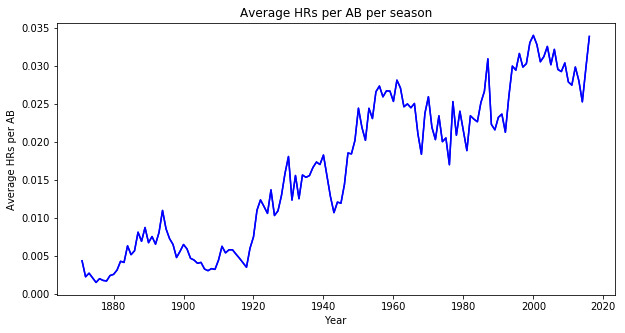

In [58]:
# bonus question 
# Using a line graph please graph the average HRs per AB (think about this) per season
df_average = df.groupby('yearID', as_index = False).mean()[['yearID', 'HR']]
df_sum = df.groupby('yearID', as_index = False).mean()[['yearID', 'AB']]

result = pd.concat([df_average, df_sum], axis=1)
result['Average HRs per AB'] = result['HR'] / result['AB']

plt.figure(figsize = (10,5))
plt.plot(result['yearID'], result['Average HRs per AB'],'b')

plt.ylabel('Average HRs per AB')
plt.xlabel('Year')
plt.title('Average HRs per AB per season')
 
plt.show()